# Visualizing Supervised Machine Learning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
import matplotlib.pyplot as plt
plt.xkcd()

In [44]:
# if this is true, all images are safed to disk
print_flag = True

In [4]:
!curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-1500.csv
# !curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-300.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 26935  100 26935    0     0  95854      0 --:--:-- --:--:-- --:--:-- 95854


In [5]:
import pandas as pd
# df = pd.read_csv('./insurance-customers-300.csv', sep=';')
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [6]:
df.head()

,max speed,age,thousand km per year,group
0,148.0,44.0,25.0,1
1,168.0,54.0,24.0,1
2,161.0,26.0,34.0,0
3,137.0,25.0,10.0,2
4,164.0,38.0,22.0,1


In [7]:
df.describe()

,max speed,age,thousand km per year,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,171.386000,44.969333,30.511333,0.998667
std,19.269126,16.935040,15.112317,0.816768
min,118.000000,18.000000,5.000000,0.000000
25%,158.000000,32.000000,18.000000,0.000000
50%,170.000000,42.000000,29.000000,1.000000
75%,187.000000,55.000000,42.000000,2.000000
max,216.000000,90.000000,84.000000,2.000000


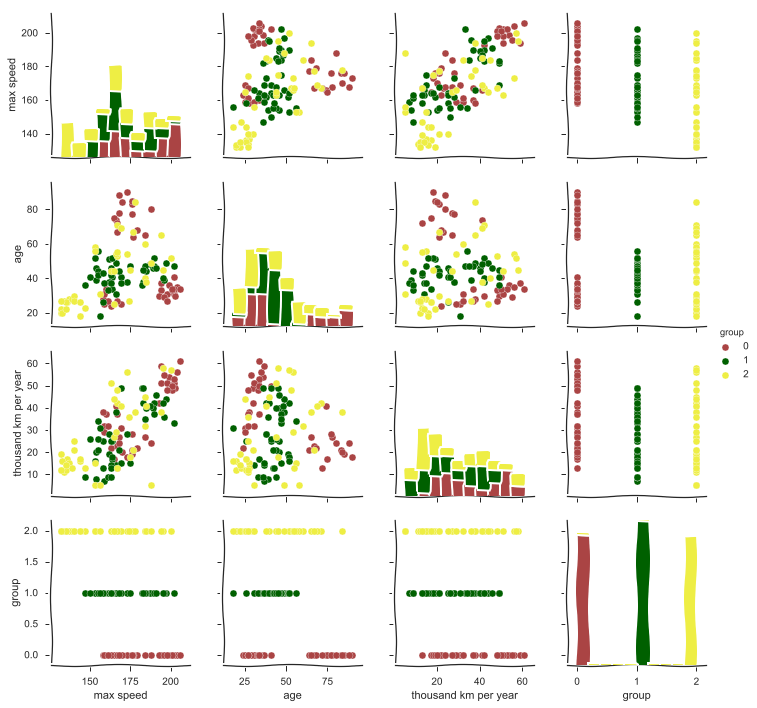

In [8]:
import seaborn as sns
sns.set(style="ticks")

sample_df = df.sample(n=120, random_state=42)

colors_light = {0: '#FFAAAA', 1: '#AAFFAA', 2: '#FFFFDD'}
colors_bold = {0: '#AA4444', 1: '#006000', 2: '#EEEE44'}

sns.pairplot(sample_df, hue="group", palette=colors_bold)

## First important concept: You train a machine with your data to make it learn the relationship between some input data and a certain label - this is called supervised learning

In [9]:
y=df['group']

In [10]:
df.drop('group', axis='columns', inplace=True)

In [11]:
X = df.as_matrix()

## We restrict ourselves to two dimensions for now

In [12]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# http://jponttuset.cat/xkcd-deep-learning/

from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#EEEE44'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   mesh=True, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=80, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)
    if fname and global_print_flag:
        plt.savefig(fname)

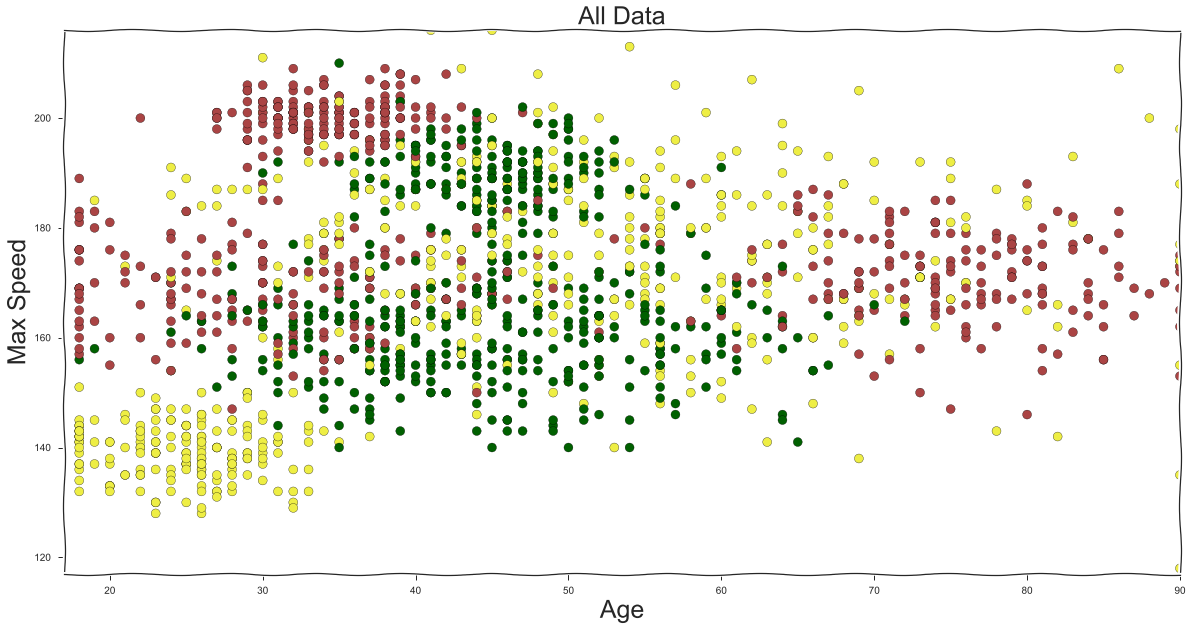

In [13]:
X_kmh_age = X[:, :2] 
plotPrediction(None, X_kmh_age[:, 1], X_kmh_age[:, 0], 
               'Age', 'Max Speed', y, mesh=False,
                title="All Data",
                fname='all.png')

## We provide a few hand built classifiers as base lines

In [14]:
# 0: red
# 1: green
# 2: yellow

class ClassifierBase:
    def predict(self, X):
        return np.array([ self.predict_single(x) for x in X])
    def score(self, X, y):
        n = len(y)
        correct = 0
        predictions = self.predict(X)
        for prediction, ground_truth in zip(predictions, y):
            if prediction == ground_truth:
                correct = correct + 1
        return correct / n

from random import randrange

class RandomClassifier(ClassifierBase):
    def predict_single(self, x):
        return randrange(3)

In [15]:
random_clf = RandomClassifier()

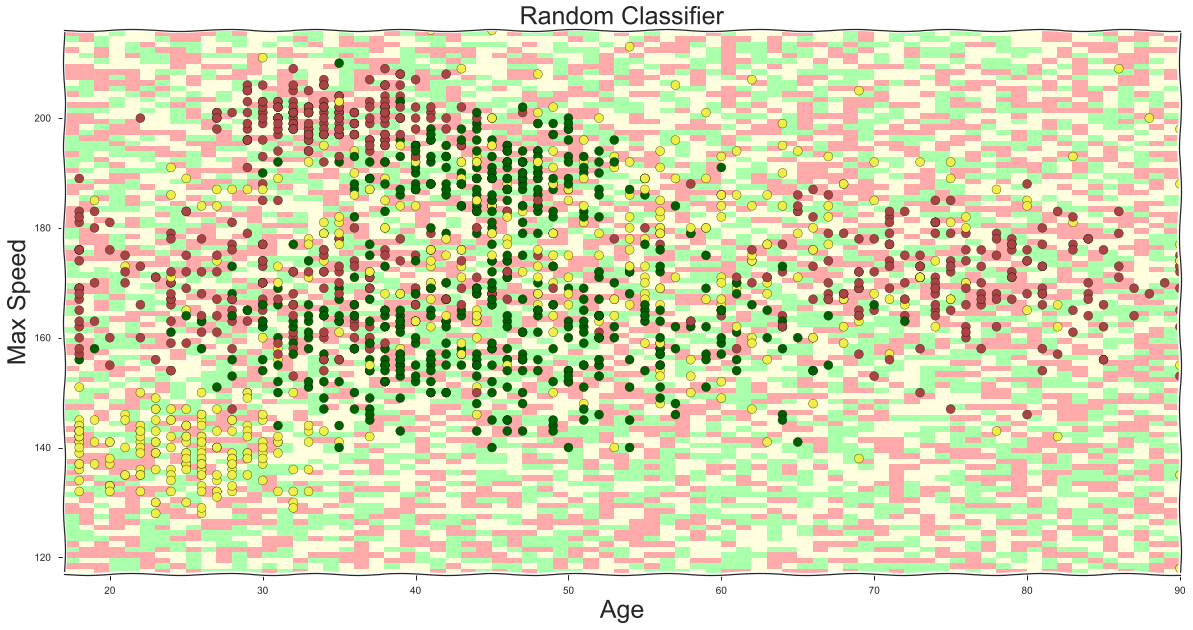

In [16]:
plotPrediction(random_clf, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="Random Classifier",
                fname='random.png')

In [17]:
random_clf.score(X, y)

0.35333333333333333

In [18]:
class BaseLineClassifier(ClassifierBase):
    def predict_single(self, x):
        try:
            speed, age, km_per_year = x
        except:
            speed, age = x
            km_per_year = 0
        if age < 25:
            if speed > 180:
                return 0
            else:
                return 2
        if age > 75:
            return 0
        if km_per_year > 50:
            return 0
        if km_per_year > 35:
            return 2
        return 1

In [19]:
base_clf = BaseLineClassifier()

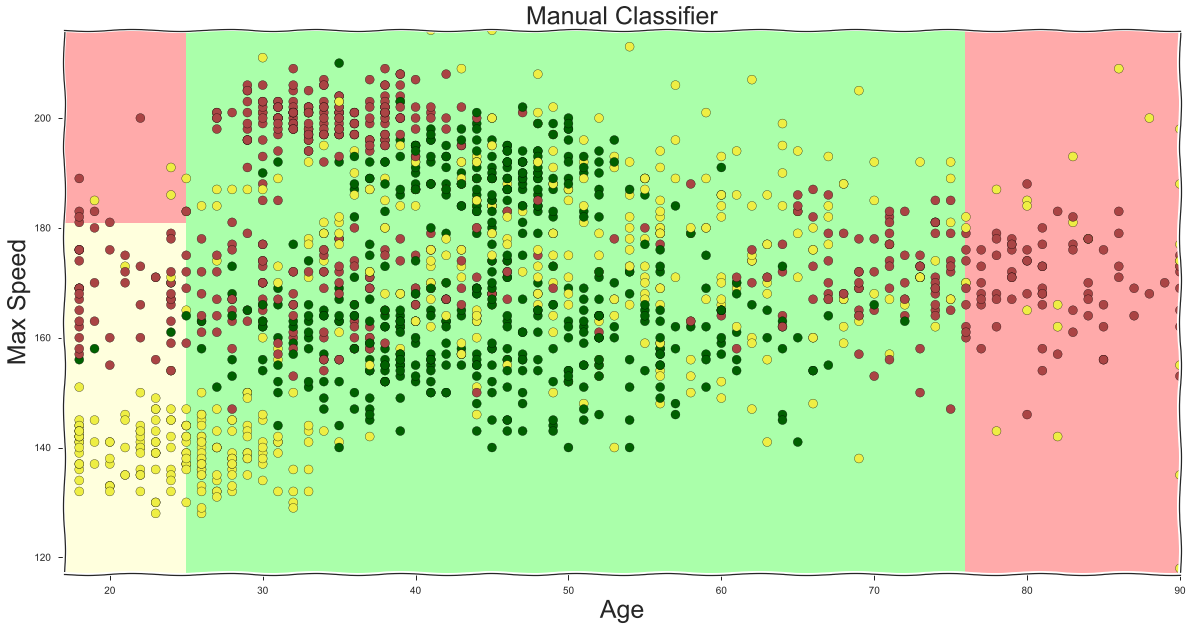

In [20]:
plotPrediction(base_clf, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="Manual Classifier",
                fname='prog.png')

In [21]:
base_clf.score(X, y)

0.454

## Second important concept: To have an idea how well the training worked, we save same data to try our model on previously unseen data. How well it performs on this test data as opposed to the training data tells us quite a bit as well.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((900, 3), (900,), (600, 3), (600,))

In [25]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2], dtype=int64), array([301, 300, 299], dtype=int64))

In [26]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2], dtype=int64), array([200, 200, 200], dtype=int64))

In [27]:
X_train_2_dim = X_train[:, :2]
X_test_2_dim = X_test[:, :2]

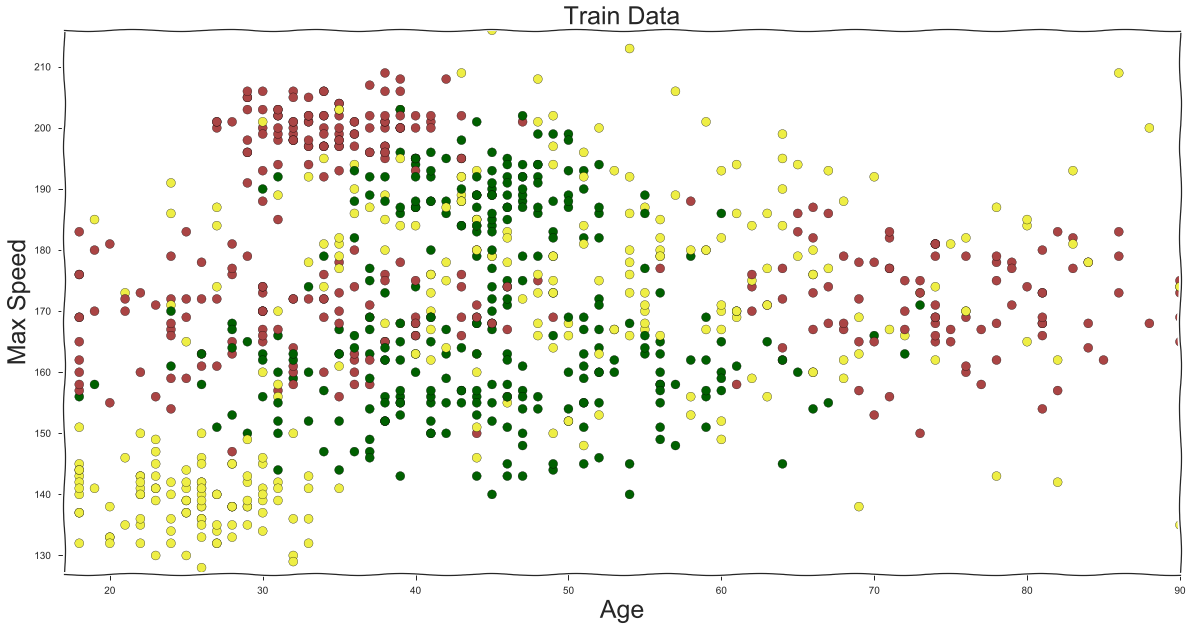

In [28]:
plotPrediction(None, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, mesh=False,
                title="Train Data",
                fname='train.png')

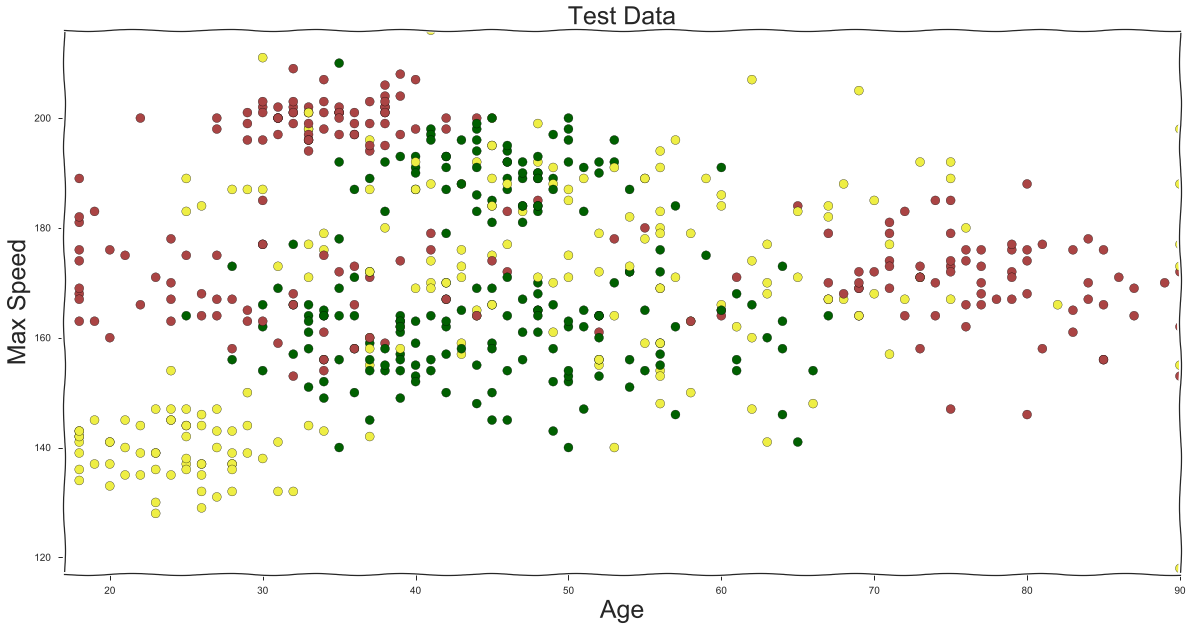

In [29]:
plotPrediction(None, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test, mesh=False,
                title="Test Data",
                fname='test.png')

## KNN - Most basic learning strategy: Look at the neighbors to make a prediction for a sample yet unknown

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(1)

In [31]:
%time clf.fit(X_train_2_dim, y_train)

Wall time: 1.97 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

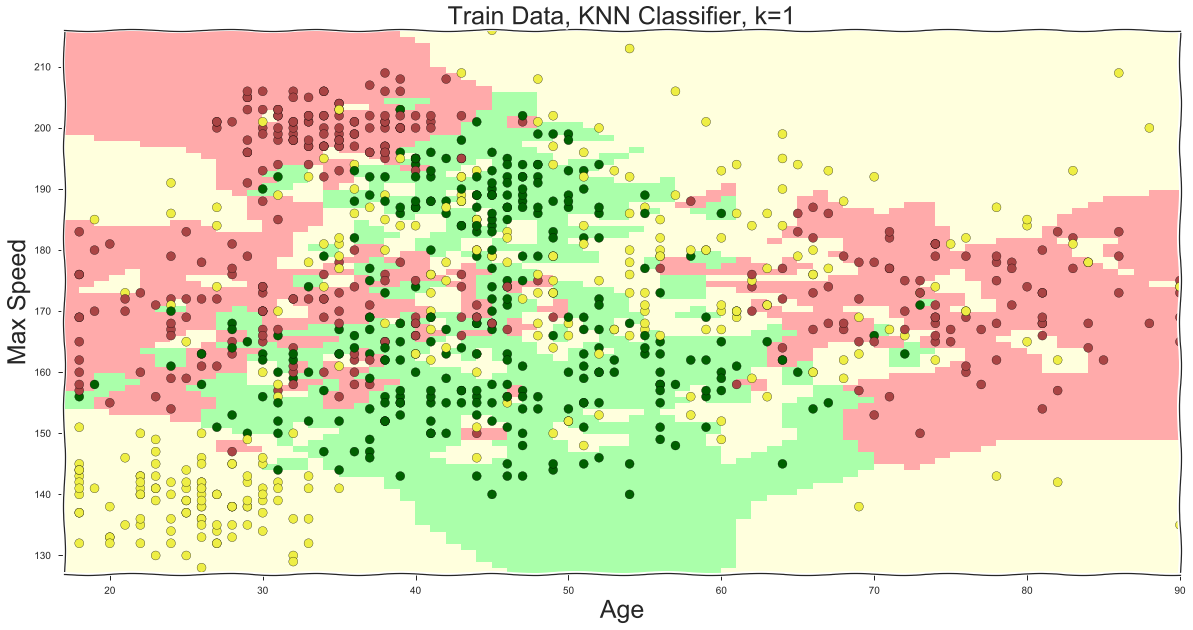

In [32]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, KNN Classifier, k=1",
                fname='knn1-train.png')

In [33]:
clf.score(X_train_2_dim, y_train)

0.9633333333333334

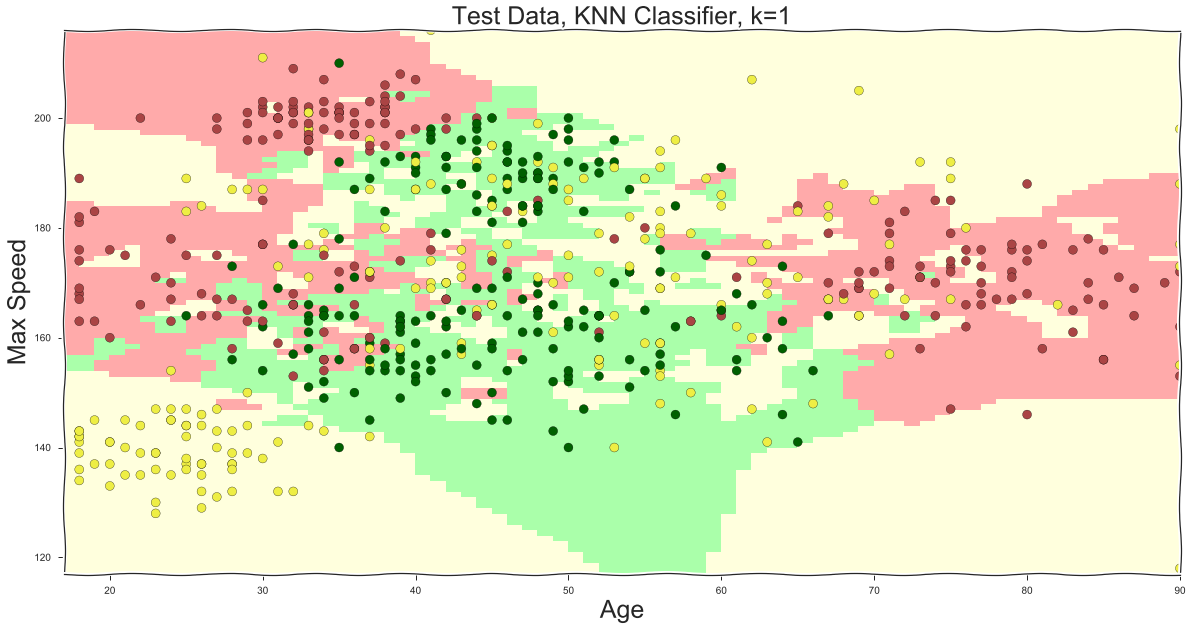

In [34]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, KNN Classifier, k=1",
                fname='knn1-test.png')

In [35]:
clf.score(X_test_2_dim, y_test)

0.6366666666666667

## Third important concept: Our objective is to make the best prediction for unknown samples. This is called generalization. If we perform well on knwon data, but less good on unknown data this is called overfitting. This is to be avoided.

### In KNN we reduce overfitting by taking more neighbors into account

In [36]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
    'n_neighbors': list(range(1, 50)),
    'weights': ['uniform', 'distance']
    }
clf = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 8.07 s


{'n_neighbors': 23, 'weights': 'uniform'}

In [37]:
clf = KNeighborsClassifier(n_neighbors=23, weights='uniform')
%time clf.fit(X_train_2_dim, y_train)

Wall time: 1 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

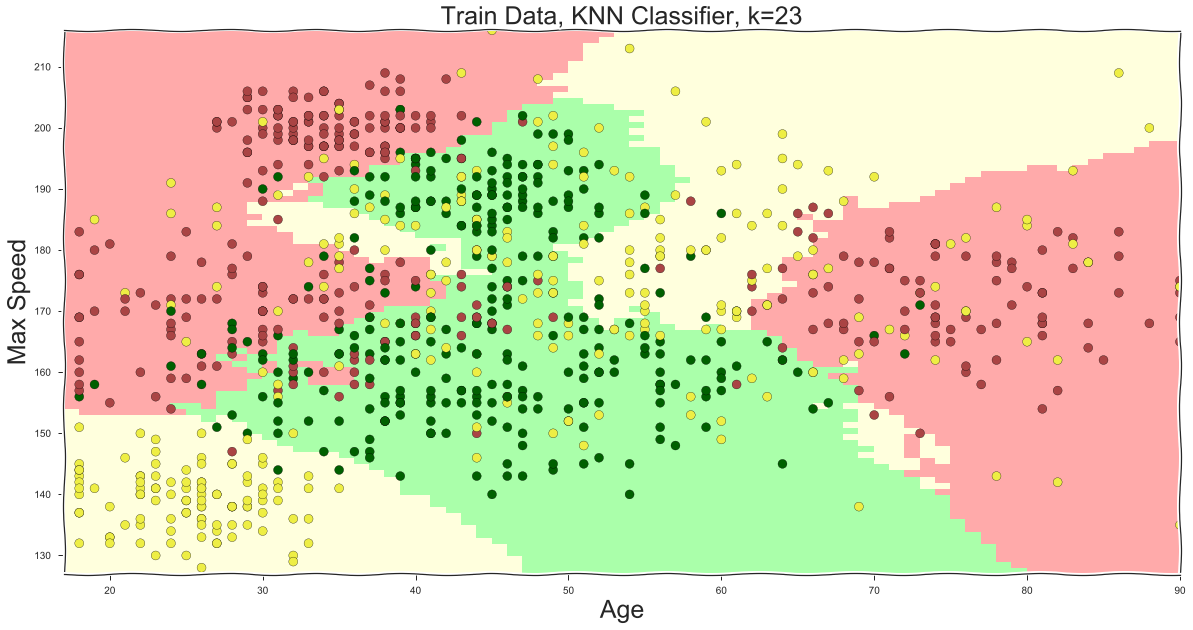

In [38]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, KNN Classifier, k=23",
                fname='knn23-train.png')

### A rule of thumb: Smoother decision boundaries imply less overfitting

In [39]:
clf.score(X_train_2_dim, y_train)

0.7322222222222222

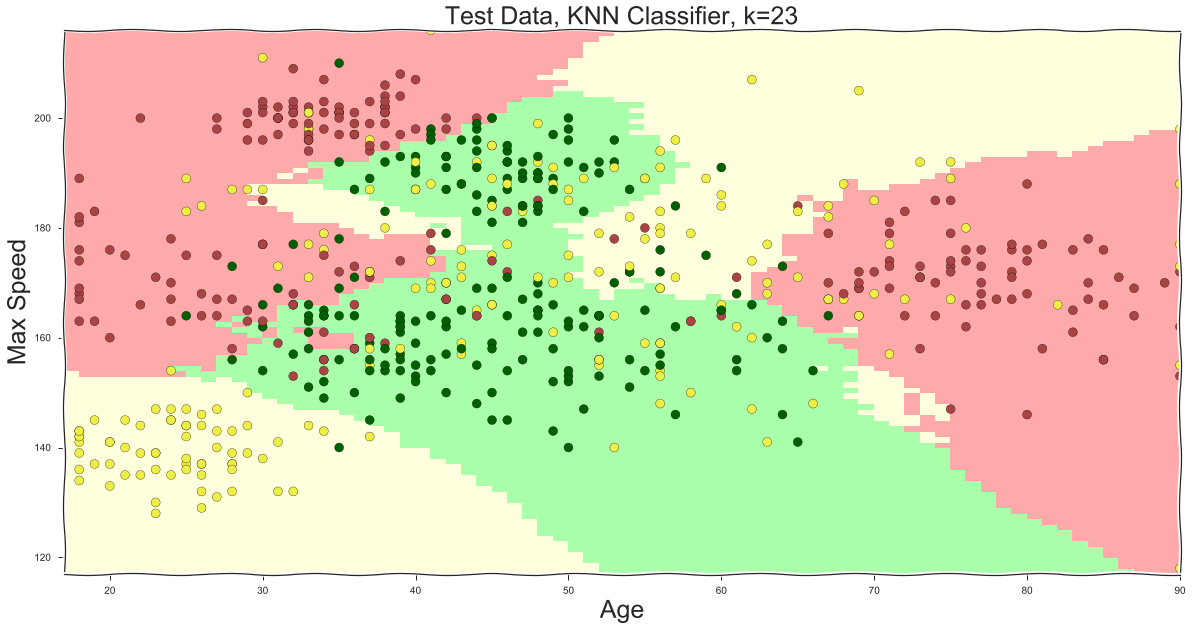

In [40]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, KNN Classifier, k=23",
                fname='knn23-test.png')

In [41]:
clf.score(X_test_2_dim, y_test)

0.7216666666666667

## Descision Trees and Random Forest